---
## Association Rules <br> <font size=3.4>Dataset:MyMovie.csv<br>Prepare rules for the all the data sets<br>1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values<br>2) Change the minimum length in apriori algorithm<br>3) Visualize the obtained rules using different plots
---

In [1]:
conda install -c conda-forge mlxtend

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mov = pd.read_csv('/Users/Ketan/Data Science/Assignments/Association Rules/my_movies.csv')

In [4]:
mov

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
mov_1 = mov.iloc[:,0:5]

In [7]:
mov_1

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [8]:
df1 = pd.get_dummies(mov_1)

In [9]:
df1

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [10]:
mov_2 = mov.iloc[:,5:15]

In [11]:
mov_2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Apriori Algorithm

### Keeping Min Support for Apriori as 10%

In [ ]:
freq_items1 = apriori(mov_2, min_support=0.10, use_colnames=True)
freq_items1

In [13]:
#Using Lift as Metric, keeping min value as 1 
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
131,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
189,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
203,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
36,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
45,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


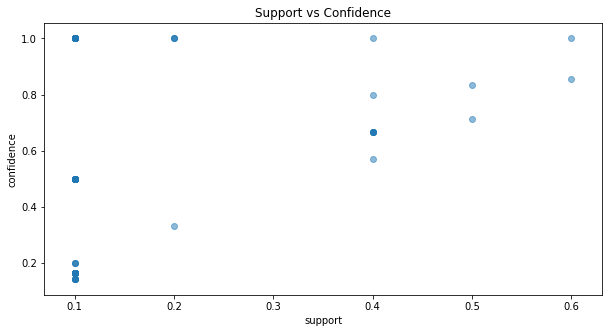

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [15]:
#Using Lift as Metric, keeping min value as 10
rules2 = association_rules(freq_items1, metric="lift", min_threshold=10)
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
31,"(Green Mile, Harry Potter1, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
23,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
24,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
25,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
26,"(Green Mile, Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
27,"(Harry Potter1, Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
28,"(Green Mile, Sixth Sense, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
29,"(Green Mile, LOTR2, LOTR1)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
30,"(LOTR2, Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
#Using Confidence as Metric, keeping min value as 75%
rules3 = association_rules(freq_items1, metric="confidence", min_threshold=0.75)
rules3.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
127,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
100,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
65,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
94,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [17]:
#Using Confidence as Metric, keeping min value as 100%
rules4 = association_rules(freq_items1, metric="confidence", min_threshold=1)
rules4.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
75,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
91,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
89,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
88,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
35,"(LOTR, Green Mile)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf


In [18]:
#Using Supprort as Metric, keeping min value as 50%
rules5 = association_rules(freq_items1, metric="support", min_threshold=0.50)
rules5.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


### Keeping Min Support for Apriori as 20%

In [19]:
freq_items2 = apriori(mov_2, min_support=0.20, use_colnames=True)
freq_items2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [20]:
#Using Lift as Metric, keeping min value as 1 
rules6 = association_rules(freq_items2, metric="lift", min_threshold=1)
rules6.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
15,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


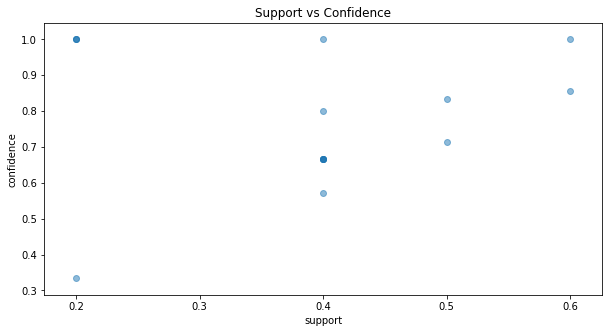

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(rules6['support'], rules6['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [22]:
#Using Confidence as Metric, keeping min value as 100%
rules7 = association_rules(freq_items2, metric="confidence", min_threshold=1)
rules7.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


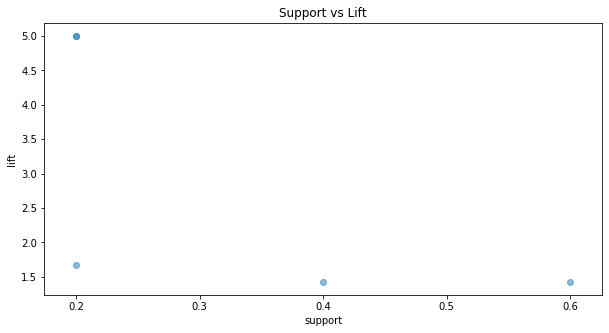

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(rules7['support'], rules7['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [24]:
#Using Confidence as Metric, keeping min value as 75%
rules7 = association_rules(freq_items2, metric="confidence", min_threshold=0.75)
rules7.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [25]:
#Using Supprort as Metric, keeping min value as 50%
rules8 = association_rules(freq_items2, metric="support", min_threshold=0.50)
rules8.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
